# Doctor's Consultation Fees Prediction
<br><br>
**Introduction**
<br><br>
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. 
<br><br>
In this project, we are using Machine Learning models to Predict a Doctor's Consultatuon Fee based on certain features.
<br><br><br>
**Features**<br><br>
1) Qualification: Qualification and degrees held by the doctor

2) Experience: Experience of the doctor in number of years

3) Rating: Rating given by patients

4) Profile: Type of the doctor

5) Miscellaneous_Info: Extra information about the doctor

6) Fees: Fees charged by the doctor (Target Variable)

7) Place: Area and the city where the doctor is located.



### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset


Loading test dataset

In [2]:
df_test=pd.read_excel("C:\\Users\\Lenovo\\Downloads\\Doctor_fee_consultation (2)\\Final Participant Data Folder\Final_Test.xlsx")

Loading train dataset

In [3]:
df_train= pd.read_excel("C:\\Users\\Lenovo\\Downloads\\Doctor_fee_consultation (2)\\Final Participant Data Folder\\Final_Train.xlsx")

### Exploratory Data Analysis¶

In [4]:
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


This shows the first five rows of the dataset.

In [5]:
df_train.shape

(5961, 7)

There are 5961 rows and 7 columns in the dataset.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


This describes the information of the the columns of the dataset. It shows the column names, count and datatype.



* We can see that there are null values in 'Rating', 'Place' and 'Miscellaneous_Info' columns.           '

In [7]:
df_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

 We can see that there are 3302 null values in 'Rating', 25 null values in  'Place' and 2620 null values in 'Miscellaneous_Info' columns. '

In [8]:
df_train.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


We can see the statistical description of the data here.

In [9]:
df_train.corr()

,Fees
Fees,1.0


<br><br>**Skewness**<br>

* If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical. If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.

* And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.
<br><br>

--->Types of Skewness<br>

*Positive skewness*: In simple words, if the skewness is greater than 0 then the distribution is positively skewed. The tail on the right side of the distribution will be longer or flatter. If the data is positively skewed than most of values will be concentrated below the average value of the data.<br>

*Negative skewness*: If the skewness is less than 0 then the distribution is negatively skewed. For negatively skewed data, most of the values will be concentrated above the average value and tail on the left side of the distribution will be longer of flatter.<br><br>

In [10]:
df_train.skew()

Fees    0.75187
dtype: float64

We can see that the Fees column is moderately skewed. It has positive skewness.

### Handling Missing Values


---> Place

Here, I am filling the null values in 'Place' column with 'Unknown,Unknown' and splitting 'Place' to create a new column 'City'.

In [11]:
df_train['Place'].fillna('Unknown,Unknown',inplace=True)
df_train['Place']=df_train['Place'].str.split(',')
df_train['City']=df_train['Place'].str[-1]
df_train['Locality']=df_train['Place'].str[0]

In [12]:
df_train['Place'].isnull().sum()

0

We can see that there are no null values in 'Place' column now.

In [13]:
df_train['City'].isnull().sum()

0

We can see that there are no null values in 'City' column as well.

<br>--->Rating

Here, I am replacing null values with -99%. After replacing the missing values, I am grouping the data into bins. Missing values will fall under class 0 while, 0-9% will be class 1, 10–19% will be class 2, so on.

In [14]:
df_train["Rating"].fillna("-99%",inplace=True)
df_train["Rating"] = df_train["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_train["Rating"] = pd.cut(df_train["Rating"],bins=bins,labels=labels,include_lowest=True)

In [15]:
df_train['Rating'].value_counts().sort_index()

0     3302
1        1
2        0
3        0
4        4
5        3
6       19
7       32
8       98
9      280
10    2222
Name: Rating, dtype: int64

In [16]:
rating_count= df_train['Rating'].value_counts().sort_index()

In [17]:
bars = range(0,11,1)

In [18]:
y_pos = np.arange(len(bars))

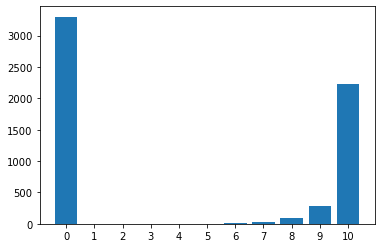

In [19]:
# Create bars
plt.bar(y_pos, rating_count)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

<br>--->Miscellaneous_Info

In [20]:
import re
df_train['Miscellaneous_Info'].fillna('missing', inplace=True)
df_test['Miscellaneous_Info'].fillna('missing', inplace=True)

def get_feedback(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df_train['Feedback'] = df_train['Miscellaneous_Info'].apply(get_feedback)
df_train['Feedback'] = df_train['Feedback'].str.replace(' Feedback','')
df_train['Feedback'] = df_train['Feedback'].astype(int)

df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)


In [21]:
def get_fee(text):
    text = re.sub(r',', "", text)
    text = re.findall(r'₹\d+', text)
    if text != []:
        return text[0]
    else:
        return 0

df_train['Misc_Fees'] = df_train['Miscellaneous_Info'].apply(get_fee)
df_train['Misc_Fees'] = df_train['Misc_Fees'].str.replace('₹','')
df_train['Misc_Fees'].fillna(50, inplace=True)
df_train['Misc_Fees'] = df_train['Misc_Fees'].astype(int)

df_test['Misc_Fees'] = df_test['Miscellaneous_Info'].apply(get_fee)
df_test['Misc_Fees'] = df_test['Misc_Fees'].str.replace('₹','')
df_test['Misc_Fees'].fillna(50, inplace=True)
df_test['Misc_Fees'] = df_test['Misc_Fees'].astype(float)

In [22]:
def clean_misc(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Miscellaneous_Info'] = df_train['Miscellaneous_Info'].apply(clean_misc)
df_test['Miscellaneous_Info'] = df_test['Miscellaneous_Info'].apply(clean_misc)

**Checking unique values**

In [23]:
uni_q= df_train['Profile'].unique()

In [24]:
len(uni_q)

6

In [25]:
df_train['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [26]:
q_unique=df_train['Profile'].value_counts()

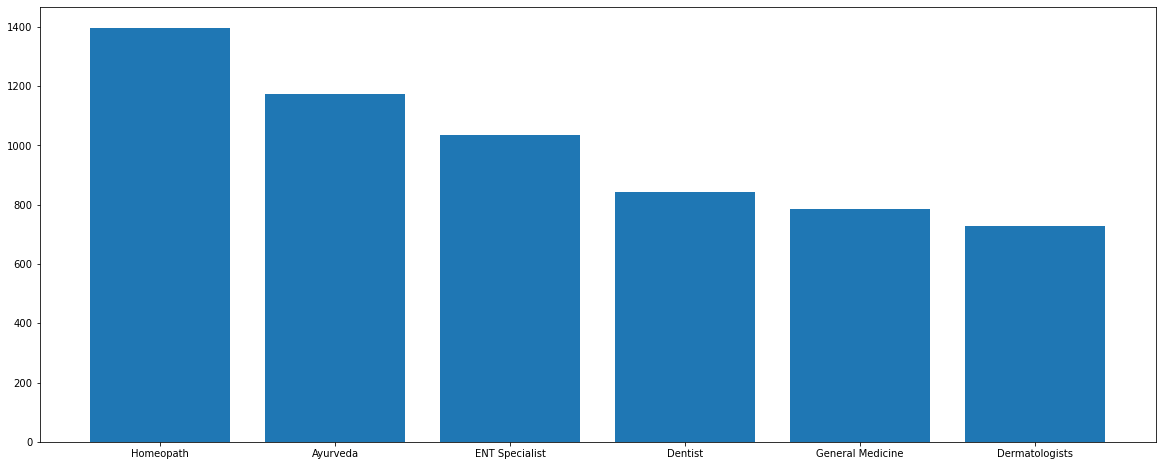

In [27]:
plt.figure(figsize=(20,8))
y_pos = np.arange(len(uni_q))

# Create bars
plt.bar(y_pos, q_unique)

# Create names on the x-axis
plt.xticks(y_pos, uni_q)

# Show graphic
plt.show()

In [28]:
print('Qualification:', df_train['Qualification'].nunique())

Qualification: 1420


In [29]:
print('Experience:', df_train['Experience'].nunique())

Experience: 64


**Data Pre-Processing**(train data)

In [30]:
df_train['Experience'] = df_train['Experience'].str.replace('years experience','').astype(int)

In [31]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['Qualification'] = df_train['Qualification'].apply(clean_text)

In [32]:
df_train['Qualification'].unique()

array(['bhms md homeopathy', 'bams md ayurveda medicine',
       'mbbs ms otorhinolaryngology', ...,
       'md dermatology venereology leprosy mbbs fellowship in dermatosurgery',
       'bds certification in smile designing',
       'md homeopathy post graduate diploma in healthcare management pgdhm dhms diploma in homeopathic medicine and surgery '],
      dtype=object)

In [33]:
def feedback_info(feedback):
    feedback = re.findall(r'\d+ Feedback', str(feedback))
    if feedback == []:
        feedback = '0 Feedback'
        return feedback
    else:
        return feedback[0]

df_train['Feedback'] = df_train['Miscellaneous_Info'].apply(feedback_info)
df_train['Feedback'] = df_train['Feedback'].str.replace(' Feedback','')
df_train['Feedback'] = df_train['Feedback'].astype(int)

In [34]:
# replacing Profile column elements with numbers.
df_train['Profile'].replace(['Dentist','General Medicine','Dermatologists','Homeopath','Ayurveda', 'ENT Specialist'],[0,1,2,3,4,5],inplace=True)

In [35]:
# droping the place variable
df_train.drop('Place',axis=1,inplace=True)

In [36]:
import re
df_train['City'] = df_train['City'].apply(lambda x: re.sub(' +','',str(x)))

In [37]:
df_train['City'].unique()

array(['Ernakulam', 'Bangalore', 'Chennai', 'Delhi', 'Hyderabad',
       'Coimbatore', 'Mumbai', 'Thiruvananthapuram', 'Unknown', 'e'],
      dtype=object)

In [38]:
df_train.groupby('City')['Locality'].nunique()

City
Bangalore             153
Chennai               124
Coimbatore             48
Delhi                 200
Ernakulam              52
Hyderabad             135
Mumbai                115
Thiruvananthapuram     48
Unknown                 1
e                       1
Name: Locality, dtype: int64

**Data Pre-Processing**(test data)

In [39]:
df_test['Experience'] = df_test['Experience'].str.replace('years experience','').astype(int)

In [40]:
df_train['Miscellaneous_Info'] = df_train['Miscellaneous_Info'].apply(lambda x: re.sub(' +','',str(x)))

In [41]:
df_test['Qualification'] = df_test['Qualification'].apply(clean_text)

---> Handling missing values in test data

In [42]:
df_test['Place'].fillna('Unknown,Unknown',inplace=True)
df_test['Place']=df_test['Place'].str.split(',')
df_test['City']=df_test['Place'].str[-1]
df_test['Locality']=df_test['Place'].str[0]

In [43]:
#dropping Place column from test data
df_test.drop('Place',axis=1,inplace=True)

In [44]:
df_test["Rating"].fillna("-99%",inplace=True)
df_test["Rating"] = df_test["Rating"].str[:-1].astype("int")
bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
df_test["Rating"] = pd.cut(df_test["Rating"],bins=bins,labels=labels,include_lowest=True)

In [45]:
df_test['Feedback'] = df_test['Miscellaneous_Info'].apply(get_feedback)
df_test['Feedback'] = df_test['Feedback'].str.replace(' Feedback','')
df_test['Feedback'] = df_test['Feedback'].astype(int)

In [46]:
df_test.head()

,Qualification,Experience,Rating,Profile,Miscellaneous_Info,Feedback,Misc_Fees,City,Locality
0,mbbs,35,0,General Medicine,missing,0,50.0,Mumbai,Ghatkopar East
1,mbbs diploma in otorhinolaryngology dlo,31,0,ENT Specialist,missing,0,50.0,Hyderabad,West Marredpally
2,mbbs ddvl,40,7,Dermatologists,70 4 feedback kk nagar chennai,0,50.0,Chennai,KK Nagar
3,bams,0,0,Ayurveda,missing,0,50.0,Delhi,New Ashok Nagar
4,bds mds conservative dentistry endodontics,16,10,Dentist,general dentistry conservative dentistry cosme...,0,50.0,Bangalore,Kanakpura Road


**Encoding Data**

In [47]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
for column in df_train.columns:
    df_train['City'] = labelencoder.fit_transform(df_train["City"])
    df_test['City'] = labelencoder.fit_transform(df_test["City"])
    df_train['Locality'] = labelencoder.fit_transform(df_train["Locality"])
    df_test['Locality'] = labelencoder.fit_transform(df_test["Locality"])
    df_train['Profile'] = labelencoder.fit_transform(df_train["Profile"])
    df_test['Profile'] = labelencoder.fit_transform(df_test["Profile"])
    df_train['Miscellaneous_Info'] = labelencoder.fit_transform(df_train["Miscellaneous_Info"])
    df_test['Miscellaneous_Info'] = labelencoder.fit_transform(df_test["Miscellaneous_Info"])

    

In [48]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
df_train['Qualification'] = labelencoder.fit_transform(df_train["Qualification"])
df_test['Qualification'] = labelencoder.fit_transform(df_test["Qualification"])
df_train['Feedback'] = labelencoder.fit_transform(df_train["Feedback"])
df_test['Feedback'] = labelencoder.fit_transform(df_test["Feedback"])

**Checking Correlation**

In [49]:
df_train.corr()

,Qualification,Experience,Profile,Miscellaneous_Info,Fees,City,Locality,Feedback,Misc_Fees
Qualification,1.000000,0.128448,0.092168,-0.120311,0.266543,-0.024599,0.006878,NaN,0.039884
Experience,0.128448,1.000000,0.038280,-0.040792,0.002117,0.017650,0.002229,NaN,0.004284
Profile,0.092168,0.038280,1.000000,-0.018524,0.130024,-0.006584,-0.039917,NaN,-0.002996
Miscellaneous_Info,-0.120311,-0.040792,-0.018524,1.000000,-0.143670,0.095714,0.046224,NaN,-0.048466
Fees,0.266543,0.002117,0.130024,-0.143670,1.000000,-0.035914,-0.062557,NaN,0.016133
City,-0.024599,0.017650,-0.006584,0.095714,-0.035914,1.000000,-0.075400,NaN,0.050298
Locality,0.006878,0.002229,-0.039917,0.046224,-0.062557,-0.075400,1.000000,NaN,0.001169
Feedback,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Misc_Fees,0.039884,0.004284,-0.002996,-0.048466,0.016133,0.050298,0.001169,NaN,1.000000


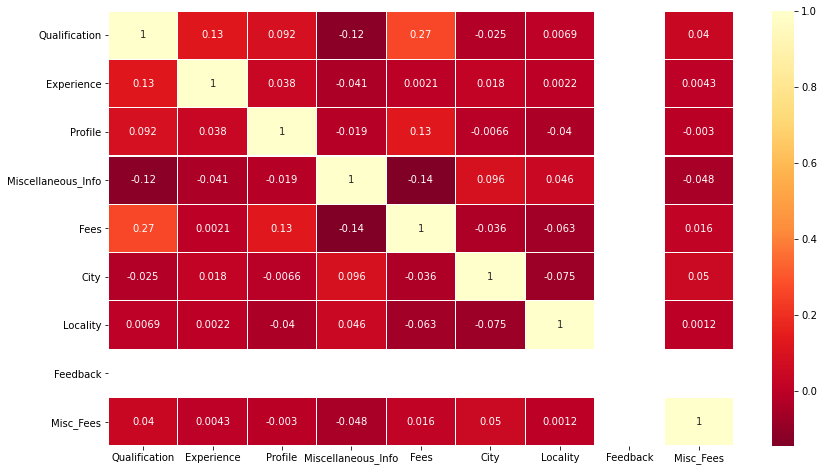

In [50]:
plt.figure(figsize=(14,8))
sns.heatmap(df_train.corr(),linewidths=.1,cmap="YlOrRd_r", annot=True)
plt.yticks(rotation=0);

Heatmap showing the correlation between the columns of the dataset.

**Checking how Fees Varies with Profile**

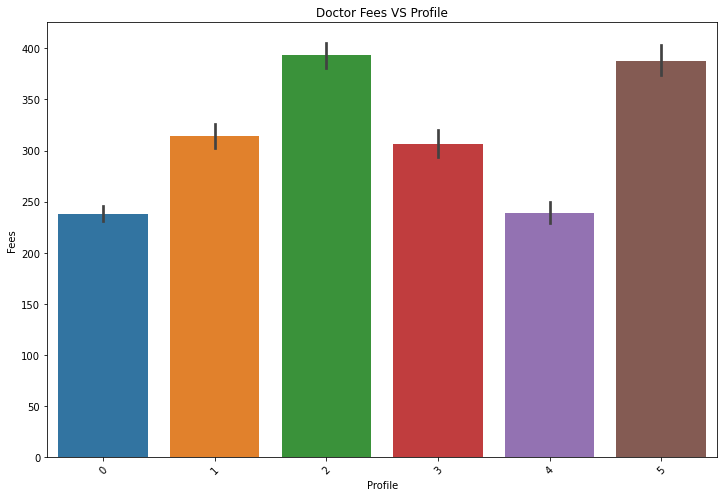

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x='Profile',y='Fees',data=df_train)
plt.title("Doctor Fees VS Profile")
plt.xticks(rotation=45)
plt.show()

**Checking how Fees Varies with City**

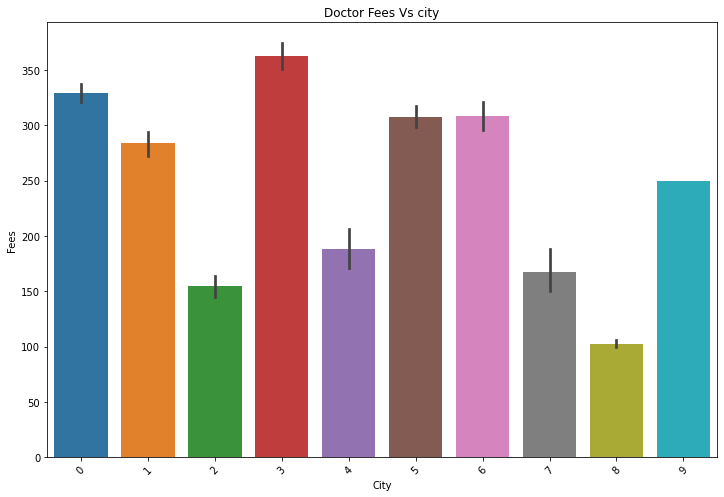

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x='City',y='Fees',data=df_train)
plt.title("Doctor Fees Vs city")
plt.xticks(rotation=45)
plt.show()

**Checking how Fees Varies with Experience**

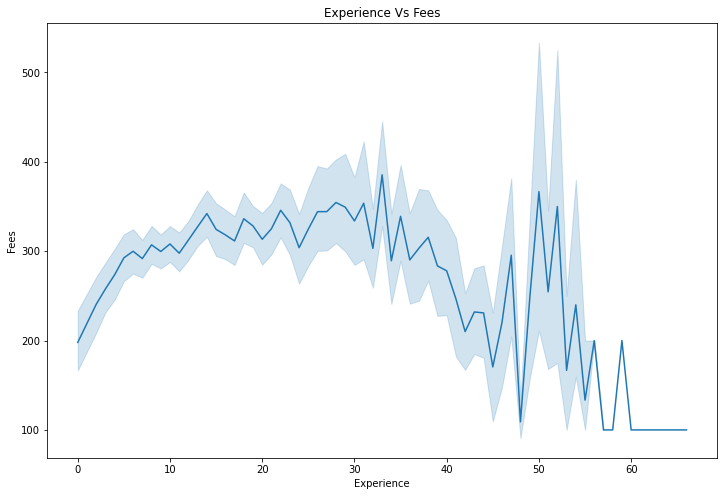

In [53]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(x='Experience',y='Fees',data=df_train)
ax.set_title("Experience Vs Fees")
plt.show()

**Checking how Fees Varies with Rating**

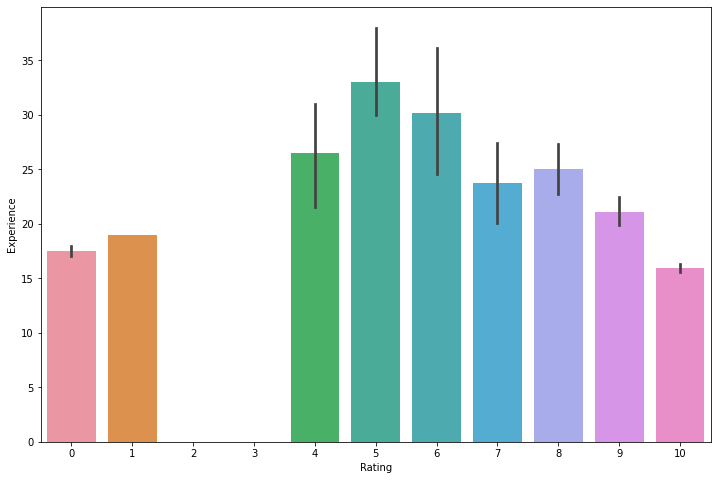

In [54]:
plt.figure(figsize=(12,8))
sns.barplot(x='Rating',y='Experience',data=df_train)
plt.show()

**OBSERVATIONS**

* We can see that the rating is high for bin5 i.e., 40-49%
* High rating does not relate to high fees charged(infact low fees can be reason of high rating) and where fees are charged so high, there rating is between 30-60%.

<br><br>

**Splitting Selected dataset into 70% and 30% to construct Training data and Testing data respectively**

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = df_train.drop("Fees",axis=1)
y = df_train["Fees"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [58]:
qua_train = X_train['Qualification']
qua_test = X_test['Qualification']

X_train['Qualification'] = labelencoder.fit_transform(qua_train)
X_test['Qualification'] = labelencoder.fit_transform(qua_test)

In [59]:
train_misc = X_train['Miscellaneous_Info']
test_misc = X_test['Miscellaneous_Info']

X_train['Miscellaneous_Info'] = labelencoder.fit_transform(train_misc)
X_test['Miscellaneous_Info'] = labelencoder.fit_transform(test_misc)

In [60]:
df_train.columns.isnull().sum()

0

In [61]:
print(X_train.shape, y_train.shape)

(4172, 9) (4172,)


In [62]:
train_exp = np.array(X_train['Experience']).reshape(-1,1)
test_exp = np.array(X_test['Experience']).reshape(-1,1)

X_train['Experience'] = labelencoder.fit_transform(train_exp)
X_test['Experience'] = labelencoder.fit_transform(test_exp)

train_feedback = np.array(X_train['Feedback']).reshape(-1,1)
test_feedback = np.array(X_test['Feedback']).reshape(-1,1)

X_train['Feedback'] = labelencoder.fit_transform(train_feedback)
X_test['Feedback'] = labelencoder.fit_transform(test_feedback)

train_rating = np.array(X_train['Rating']).reshape(-1,1)
test_rating = np.array(X_test['Rating']).reshape(-1,1)

X_train['Rating'] = labelencoder.fit_transform(train_rating)
X_test['Rating'] = labelencoder.fit_transform(test_rating)

train_miscfees = np.array(X_train['Misc_Fees']).reshape(-1,1)
test_miscfees = np.array(X_test['Misc_Fees']).reshape(-1,1)

X_train['Misc_Fees'] = labelencoder.fit_transform(train_miscfees)
X_test['Misc_Fees'] = labelencoder.fit_transform(test_miscfees)

### Predictive Modeling

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV

**Checking RMSE Scores**

Decision Tree Model

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 191.21632196757966
MSE: 61519.4667411962
RMSE: 248.03118098577082


In [122]:
model_tree = DecisionTreeClassifier() 
model_tree.fit(X_train, y_train)
prediction_tree = model_tree.predict(X_test)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction_tree, y_test))

The accuracy of the Decision Tree is  0.10955841252096143


Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 154.21853456307062
MSE: 34363.75482251258
RMSE: 185.37463370837062


In [124]:
model_random = RandomForestClassifier(n_estimators=300)
model_random.fit(X_train, y_train)
predict_random = model_random.predict(X_test)
print('The accuracy of the  Random Forest is ', metrics.accuracy_score(predict_random, y_test))

The accuracy of the  Random Forest is  0.22414756847400782


Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [69]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 143.06499101693248
MSE: 32922.51221429425
RMSE: 181.4456177875185


In [121]:
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, y_train)
prediction_log = model_log.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction_log, y_test))

The accuracy of the Logistic Regression is 0.013974287311347122


KNN Model

In [70]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
pred = model_knn.predict(X_test)

In [71]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 189.7842370039128
MSE: 59338.19228619341
RMSE: 243.59431907619154


In [123]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
prediction_knn = model_knn.predict(X_test)
print('The accuracy of the  K-Nearest Neighbours is ', metrics.accuracy_score(prediction_knn, y_test))

The accuracy of the  K-Nearest Neighbours is  0.16769144773616546


GaussianNB Model

In [72]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
pred = model_gaus.predict(X_test)

In [73]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))


MAE: 224.13862493012857
MSE: 85870.16545556177
RMSE: 293.036116298933


In [125]:
model_gaus = GaussianNB()
model_gaus.fit(X_train, y_train)
prediction_gaus = model_gaus.predict(X_test)
print('The accuracy of the  Gaussian Naive Bayes is ', metrics.accuracy_score(prediction_gaus, y_test))

The accuracy of the  Gaussian Naive Bayes is  0.06148686416992733


SVR Model

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
from sklearn.svm import SVR
svr = SVR(gamma="scale")
svr.fit(scaler.transform(X_train),y_train)

SVR()

In [104]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
# Prediction
y_pred = svr.predict(scaler.transform(X_test))
score(y_pred,y_test)

0.7583976360276898

We can see that we got higest accuracy score with SVR Model.

In [74]:
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

### Hyper Parameter Tuning

In [80]:
n_estimator =range(50, 1000, 50)
hyper = {'n_estimators': n_estimator}
gd = GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed: 16.4min finished


0.3090106156157001
RandomForestClassifier(n_estimators=900, random_state=0)


In [81]:
gd.best_params_

{'n_estimators': 900}

In [82]:
from sklearn.metrics import r2_score, mean_squared_error
best_reg = gd.best_estimator_
y_pred = best_reg.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

214.9645101806982

**--->Logistic Regression**

In [83]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X, y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.23267747542994086


**--->Decision Tree Regression Model**

In [84]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [85]:
tuning_model=GridSearchCV(model_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [86]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [88]:
X=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

In [90]:
from sklearn.tree import DecisionTreeRegressor
tuned_hyper_model= DecisionTreeRegressor(max_depth=5,max_features='auto',max_leaf_nodes=50,min_samples_leaf=2,min_weight_fraction_leaf=0.1,splitter='random')

In [94]:
# fitting model

tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=50,
                      min_samples_leaf=2, min_weight_fraction_leaf=0.1,
                      splitter='random')

In [95]:
# prediction 

tuned_pred=tuned_hyper_model.predict(X_test)

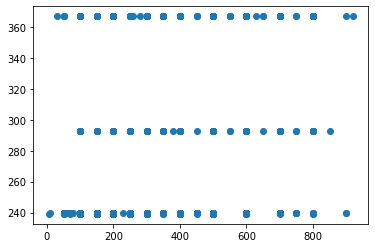

In [96]:
plt.scatter(y_test,tuned_pred)

In [98]:
# With hyperparameter tuned Decision Tree Model

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 146.96753558867925
MSE: 33603.86992987534
RMSE: 183.313583593457


**--->KNN Model**

In [99]:
#With Hyper Parameters Tuning
#2-4,kNearestNeighbors
#importing modules
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model_knn, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train,y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction,y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.1475684740078256
Confusion Metrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   

**--->SVR Model**

In [106]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVR(gamma="scale"), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.002, total=   1.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.002, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.5s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.008, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.002, total=   1.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.001, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.015, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.016, total=   1.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.007, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.014, total=   1.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  3.1min finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [107]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVR(C=100, gamma=0.1)


### Saving the Model

In [116]:
import joblib

In [117]:
joblib.dump(svr, 'Doctor_Consultation_Fee_Prediction.pkl')

['Doctor_Consultation_Fee_Prediction.pkl']

In [118]:
# Load the model from the file
svr_from_joblib = joblib.load('Doctor_Consultation_Fee_Prediction.pkl')

In [119]:
# Use the loaded model to make predictions
svr_from_joblib.predict(X_test)

array([268.27852774, 268.27852774, 268.27852774, ..., 268.27852774,
       268.27852774, 268.27852774])